In [1]:
import numpy as np

from lets_plot import *


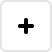
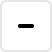
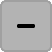
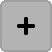
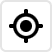
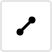
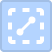
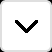
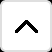
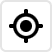
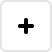
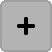
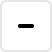
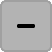
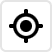
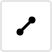
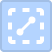
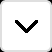
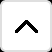
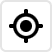

In [2]:
LetsPlot.setup_html()

In [3]:
def get_big_data(n, seed=42):
    np.random.seed(seed)
    return {
        'x': np.random.normal(size=n),
        'y': np.random.normal(size=n),
    }

def get_big_data_plot(big_data, method):
    return ggplot(big_data, aes('x', 'y')) + \
        geom_pointdensity(method=method, show_legend=False) + \
        theme_void()

In [4]:
size_min = 5_000
size_max = 50_000
step = 2_500
data = {'dataset_size': [], 'avg_time': [], 'method': []}
for method in ['neighbours', 'kde2d']:
    for size in range(size_min, size_max + 1, step):
        big_data = get_big_data(size)
        print(f"method={method}, size={size}")
        t = %timeit -r 10 -n 2 -o get_big_data_plot(big_data, method)._repr_html_()
        data['dataset_size'].append(size)
        data['avg_time'].append(t.average)
        data['method'].append(method)

method=neighbours, size=5000
229 ms ± 5.38 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=7500
424 ms ± 8.94 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=10000
636 ms ± 7.85 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=12500
937 ms ± 4.65 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=15000
1.31 s ± 11.1 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=17500
1.68 s ± 17.5 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=20000
2.07 s ± 19.5 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=22500
2.64 s ± 14.6 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=25000
3.05 s ± 62 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
method=neighbours, size=27500
3.71 s ± 31.9 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
meth

In [5]:
br = "\n"
print(f'''
{ '{' }
    {
      (br + "    ").join([f"'{k}': {v}," for k, v in data.items()])
    }
{ '}' }
''')


{
    'dataset_size': [5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500, 50000, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500, 50000],
    'avg_time': [0.22910274409987325, 0.42363838564997425, 0.6361508867998055, 0.9365715905996694, 1.3101045889001397, 1.67773163799975, 2.072044827999707, 2.6449561142002493, 3.046768643499854, 3.7139715935998536, 4.270542407550238, 4.977847968149945, 5.79236737555002, 6.592572286649738, 7.308833358750053, 8.19861964879983, 9.197693487199649, 10.152860054500342, 10.876044953200108, 0.539729310200164, 0.81426135054935, 1.1077497410999058, 1.3938230340996598, 1.685600599200552, 1.9772842960499475, 2.2596998533999795, 2.5570663056998457, 2.8528715123000437, 3.171823968100034, 3.5004342326996265, 3.7956589368499407, 4.12725275865032, 4.438478636550281, 4.743070613099917, 5.049071830150024, 5.260411102299986

In [6]:
ggplot(data, aes("dataset_size", "avg_time", color="method")) + geom_line() + geom_point() + ggsize(1000, 600)